In [582]:
# Which age groups (15-24, 25-54, 55-64, 65+) suffer the highest suicide rates compared to their unemployment rates?

# EPI Data Library - Unemployment.csv -> for unemployement
# Death_rates_for_suicide_by_sex_race_age_United_States.csv - for suicides

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [583]:
# creating a new dataframe and reading the file
file = "EPI Data Library - Unemployment.csv"
df_unemployment = pd.read_csv(file)
df_unemployment.head()

,Date,All,Women,Men,Black,Hispanic,White,Black Women,Black Men,Hispanic Women,...,White Women 55-64,White Women 65+,White Men 16-24,White Men 25-54,White Men 55-64,White Men 65+,16-24,25-54,55-64,65+
0,Dec.24,4.00%,3.90%,4.10%,6.20%,5.10%,3.20%,5.80%,6.70%,5.40%,...,2.00%,2.70%,7.80%,2.90%,2.50%,2.80%,8.90%,3.40%,2.80%,3.10%
1,Nov.24,4.00%,3.90%,4.10%,6.10%,5.00%,3.20%,5.70%,6.60%,5.30%,...,2.00%,2.70%,7.70%,2.90%,2.50%,2.70%,8.90%,3.40%,2.80%,3.10%
2,Oct.24,4.00%,3.80%,4.10%,6.10%,5.00%,3.10%,5.60%,6.60%,5.20%,...,2.00%,2.60%,7.50%,2.80%,2.60%,2.70%,8.70%,3.40%,2.80%,3.10%
3,Sep.24,3.90%,3.80%,4.10%,6.10%,5.00%,3.10%,5.70%,6.60%,5.10%,...,2.10%,2.70%,7.50%,2.80%,2.50%,2.70%,8.70%,3.30%,2.80%,3.10%
4,Aug.24,3.90%,3.70%,4.10%,6.10%,4.90%,3.10%,5.60%,6.60%,5.00%,...,2.20%,2.60%,7.50%,2.80%,2.50%,2.70%,8.60%,3.30%,2.70%,3.00%


In [584]:
# extracting the columns that show the age groups among the unemployed 
df_unemployment = df_unemployment[["Date", "All", "16-24", "25-54", "55-64", "65+"]]
df_unemployment

,Date,All,16-24,25-54,55-64,65+
0,Dec.24,4.00%,8.90%,3.40%,2.80%,3.10%
1,Nov.24,4.00%,8.90%,3.40%,2.80%,3.10%
2,Oct.24,4.00%,8.70%,3.40%,2.80%,3.10%
3,Sep.24,3.90%,8.70%,3.30%,2.80%,3.10%
4,Aug.24,3.90%,8.60%,3.30%,2.70%,3.00%
...,...,...,...,...,...,...
548,Apr.79,5.90%,11.90%,4.20%,2.80%,3.70%
549,Mar.79,6.00%,12.00%,4.30%,2.80%,3.80%
550,Feb.79,6.00%,12.20%,4.30%,2.80%,3.80%
551,Jan.79,6.10%,12.30%,4.30%,2.90%,3.70%


In [585]:
# adding the year column
df_unemployment['Date'] = pd.to_datetime(df_unemployment['Date'], format='%b.%y')
df_unemployment['Year'] = df_unemployment['Date'].dt.year
df_unemployment

,Date,All,16-24,25-54,55-64,65+,Year
0,2024-12-01,4.00%,8.90%,3.40%,2.80%,3.10%,2024
1,2024-11-01,4.00%,8.90%,3.40%,2.80%,3.10%,2024
2,2024-10-01,4.00%,8.70%,3.40%,2.80%,3.10%,2024
3,2024-09-01,3.90%,8.70%,3.30%,2.80%,3.10%,2024
4,2024-08-01,3.90%,8.60%,3.30%,2.70%,3.00%,2024
...,...,...,...,...,...,...,...
548,1979-04-01,5.90%,11.90%,4.20%,2.80%,3.70%,1979
549,1979-03-01,6.00%,12.00%,4.30%,2.80%,3.80%,1979
550,1979-02-01,6.00%,12.20%,4.30%,2.80%,3.80%,1979
551,1979-01-01,6.10%,12.30%,4.30%,2.90%,3.70%,1979


In [586]:
# taking the average of the age groups among the unemployed by year and assigning the results to a new dataframe


for col in df_unemployment.columns: # checks if the columns of the dataframe includes "%", if so, the string will be removed.
    if df_unemployment[col].dtype == 'object':  
        df_unemployment[col] = df_unemployment[col].str.rstrip('%').astype(float)
        
df_unemployment_avg_by_year = df_unemployment.groupby('Year').mean()
df_unemployment_avg_by_year.reset_index(inplace=True)
df_unemployment_avg_by_year = df_unemployment_avg_by_year.query("1980 <= Year <= 2018").reset_index(drop=True)
df_unemployment_avg_by_year['Avg By Age'] = df_unemployment_avg_by_year[['16-24', '25-54', '55-64', '65+']].mean(axis=1)
df_unemployment_avg_by_year = df_unemployment_avg_by_year[['Year', '16-24', '25-54', '55-64', '65+', 'Avg By Age']]
df_unemployment_avg_by_year


,Year,16-24,25-54,55-64,65+,Avg By Age
0,1980,13.008333,4.825000,3.016667,3.066667,5.979167
1,1981,14.733333,5.775000,3.591667,2.983333,6.770833
2,1982,16.541667,6.866667,4.525000,3.250000,7.795833
3,1983,18.091667,8.391667,5.683333,3.608333,8.943750
4,1984,15.333333,6.825000,4.916667,3.375000,7.612500
5,1985,13.700000,5.925000,4.383333,3.091667,6.775000
6,1986,13.475000,5.733333,4.158333,3.066667,6.608333
7,1987,12.850000,5.408333,3.725000,2.683333,6.166667
8,1988,11.558333,4.683333,3.316667,2.500000,5.514583
9,1989,10.925000,4.275000,3.091667,2.583333,5.218750


In [587]:
# extracting the average unemployement rate of every age group since 1980 to 2018
average_per_column = df_unemployment_avg_by_year.iloc[:, 1:].mean()
average_per_column

16-24         12.873077
25-54          5.198932
55-64          4.019444
65+            3.723718
Avg By Age     6.453793
dtype: float64

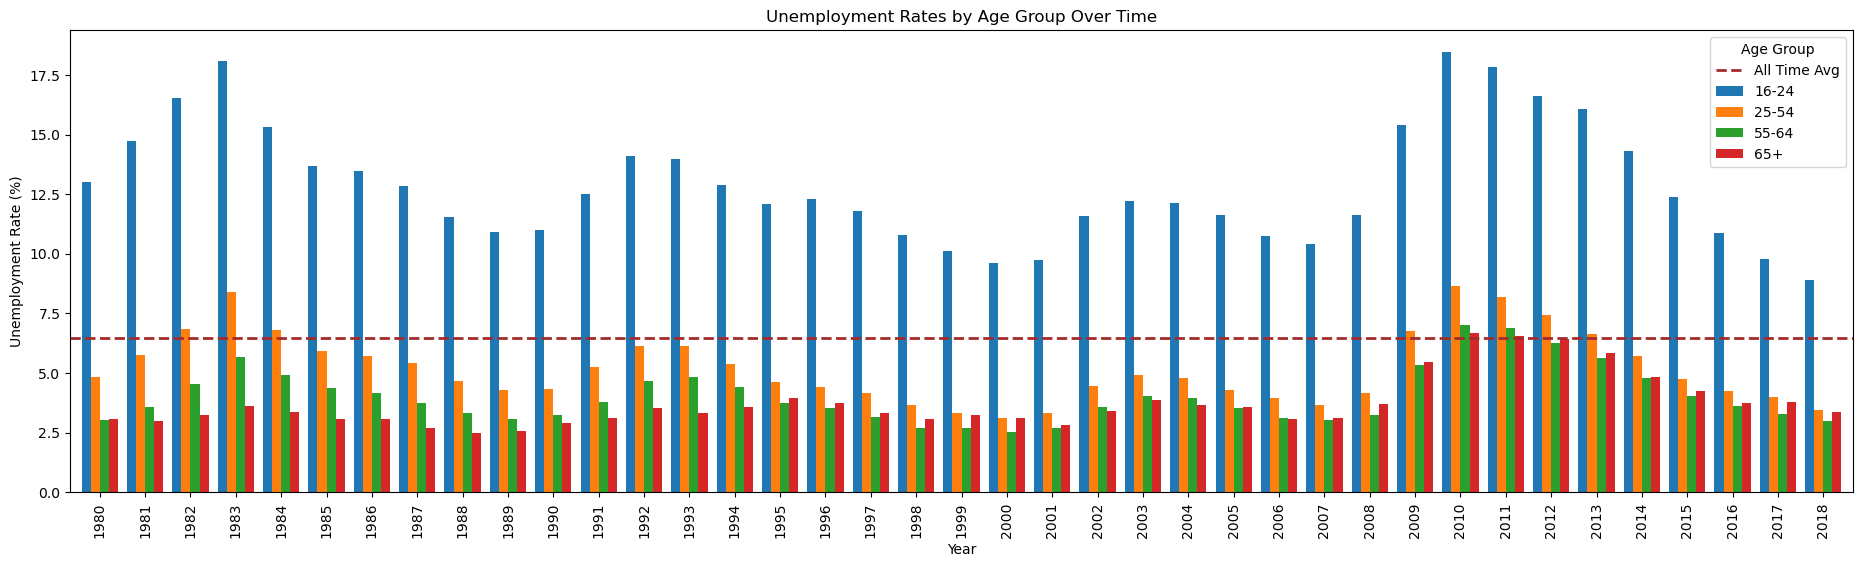

In [588]:
# Taking the average of every age group and their 38 year overall average and plotting these two.

average_unemployment_rate = average_per_column['Avg By Age']

df_plot = df_unemployment_avg_by_year[['Year', '16-24', '25-54', '55-64', '65+']]
ax = df_plot.set_index('Year').plot(kind='bar', figsize=(23, 6), width=0.8)

plt.axhline(y=average_unemployment_rate, color='brown', linestyle='--', linewidth=2, label='All Time Avg')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rates by Age Group Over Time")
plt.legend(title="Age Group")
plt.show()


# Death_rates_for_suicide_by_sex_race_age_United_States.csv - for suicides


In [589]:
# creating a new dataframe and reading the file

file = "Death_rates_for_suicide_by_sex_race_age_United_States.csv"
df_suicide_by_age = pd.read_csv(file)
df_suicide_by_age

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


In [590]:
# extracting the columns needed

df_suicide_filtered = df_suicide_by_age[["YEAR", "AGE", "ESTIMATE"]]
df_suicide_filtered

,YEAR,AGE,ESTIMATE
0,1950,All ages,13.2
1,1960,All ages,12.5
2,1970,All ages,13.1
3,1980,All ages,12.2
4,1981,All ages,12.3
...,...,...,...
6385,2018,65 years and over,1.3
6386,2018,15-24 years,4.1
6387,2018,25-44 years,4.4
6388,2018,45-64 years,3.2


In [591]:
# finding the unique rows

df_suicide_by_age['AGE'].unique()

array(['All ages', '10-14 years', '15-24 years', '15-19 years',
       '20-24 years', '25-44 years', '25-34 years', '35-44 years',
       '45-64 years', '45-54 years', '55-64 years', '65 years and over',
       '65-74 years', '75-84 years', '85 years and over'], dtype=object)

In [592]:
# filtering the dataset to include only relevant age groups, merging '25-44 years' and '45-54 years' into '25-54 years', 
# keeping data from 1980 onwards, calculating the mean suicide rate per year for each age group, and sorting the results.

suicide_by_age = [
    '15-24 years', 
    '25-44 years', 
    '45-54 years',
    '55-64 years', 
    '65 years and over'
]

df_suicide_filtered = df_suicide_filtered[df_suicide_filtered['AGE'].isin(suicide_by_age)]

df_suicide_filtered = df_suicide_filtered[df_suicide_filtered['YEAR'] >= 1980]

df_suicide_filtered['AGE'] = df_suicide_filtered['AGE'].replace({'25-44 years': '25-54 years', '45-54 years': '25-54 years'})

df_suicide_filtered = df_suicide_filtered.groupby(['YEAR', 'AGE'], as_index=False)['ESTIMATE'].mean()

df_suicide_filtered = df_suicide_filtered.sort_values(by=['YEAR', 'AGE'])

df_suicide_filtered

,YEAR,AGE,ESTIMATE
0,1980,15-24 years,14.833333
1,1980,25-54 years,15.000000
2,1980,55-64 years,16.266667
3,1980,65 years and over,18.900000
4,1981,15-24 years,10.871429
...,...,...,...
151,2017,65 years and over,12.400000
152,2018,15-24 years,16.537838
153,2018,25-54 years,18.341463
154,2018,55-64 years,20.466667


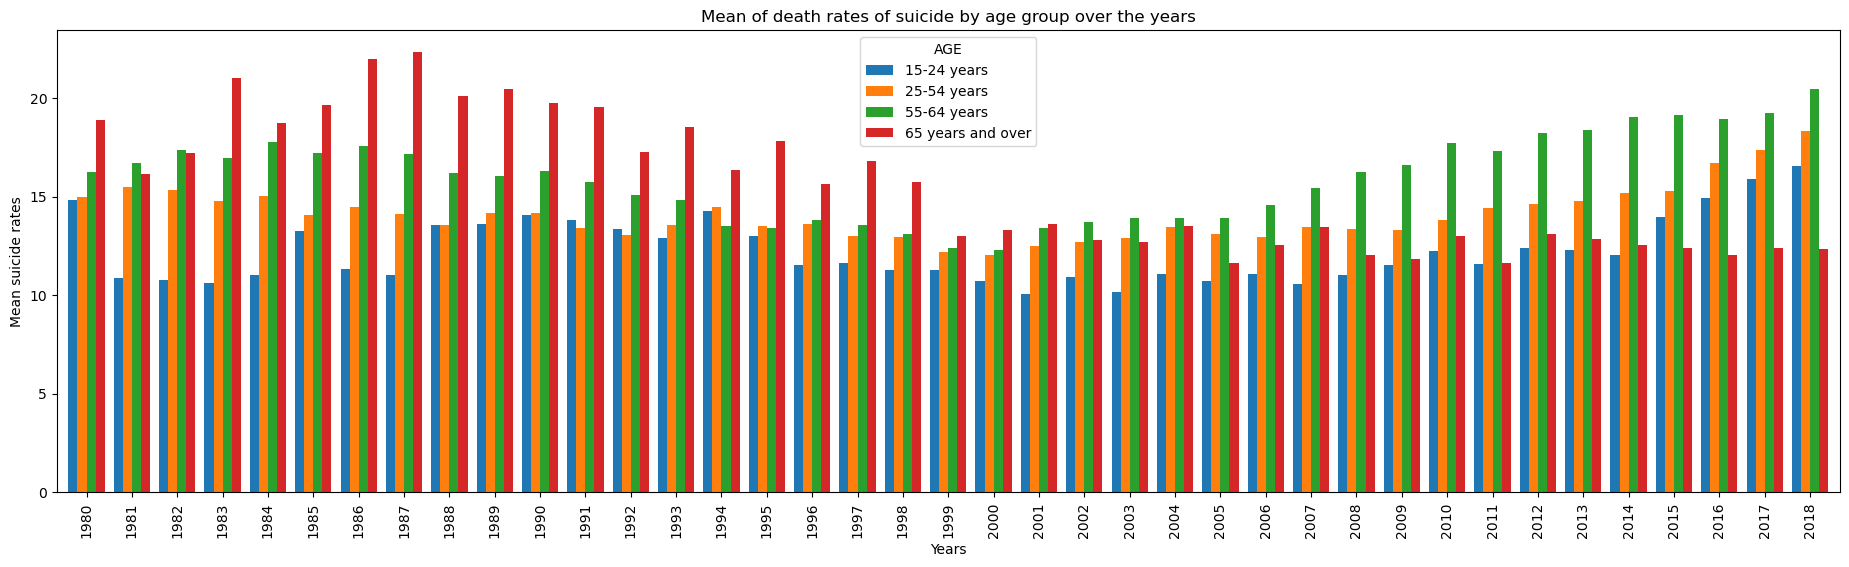

In [593]:
# pivoting the suicide dataset to structure it for visualization, where years are the index, age groups are columns, 
# and values represent the mean suicide rates per year; then plotting a bar chart to show trends over time.

death_data_pivot = df_suicide_filtered.pivot_table(index='YEAR', columns='AGE', values='ESTIMATE', aggfunc='mean')
death_data_pivot.plot(kind='bar', figsize=(23, 6), rot=90, width=0.8)

plt.xlabel('Years')
plt.ylabel('Mean suicide rates')
plt.title('Mean of death rates of suicide by age group over the years')

plt.show()

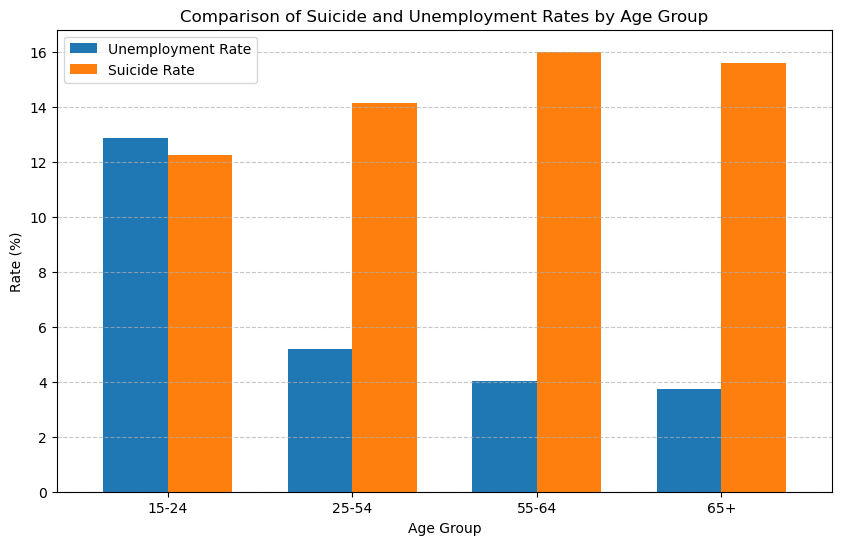

In [594]:
# calculating the average unemployment and suicide rates for each age group and storing them in a DataFrame for comparison and visualization. 

unemployment_avg = df_unemployment_avg_by_year[['16-24', '25-54', '55-64', '65+']].mean()
suicide_avg = df_suicide_filtered.groupby('AGE')['ESTIMATE'].mean()

unemployment_avg.index = ["15-24", "25-54", "55-64", "65+"]
suicide_avg.index = ["15-24", "25-54", "55-64", "65+"]

comparison_df = pd.DataFrame({
    "Unemployment Rate": unemployment_avg,
    "Suicide Rate": suicide_avg
})

# plotting the two dataframes' average rate of change over years for each age group as histograms.

comparison_df.plot(kind='bar', figsize=(10, 6), width=0.7)
plt.xlabel("Age Group")
plt.ylabel("Rate (%)")
plt.title("Comparison of Suicide and Unemployment Rates by Age Group")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc="upper left")

plt.show()

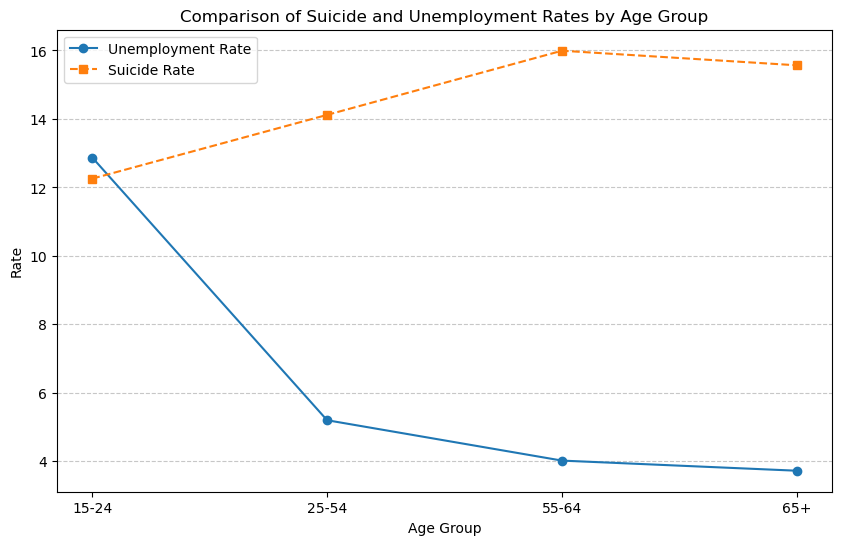

In [595]:
# plotting the two dataframes' average rate of change over years for each age group as line graphs.

plt.figure(figsize=(10, 6))

plt.plot(comparison_df.index, comparison_df["Unemployment Rate"], marker='o', linestyle='-', label="Unemployment Rate")
plt.plot(comparison_df.index, comparison_df["Suicide Rate"], marker='s', linestyle='--', label="Suicide Rate")

plt.xlabel("Age Group")
plt.ylabel("Rate")
plt.title("Comparison of Suicide and Unemployment Rates by Age Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()
